# Python Assignment 1 Kinetic Modelling

---

Please read the introduction document before starting this assignment. First we will look into simple unimolecular and bimolecular reactions, we will use scipy.integrate.ode_int() on these problems as well to see how close they are to the analytical solutions. Then we will go into more complicated mechnisms that cannot be solved analytically and compare to experimental data. To estimate kinetic parameters

As a first excersize, define functions for the unimolecular and bimolecular reactions as given in the introducary documents and plot both concentrations in time, use k1 = 0.1 s$^{-1}$ and k2 = 50 s$^{-1}$ M$^{-1}$ and initial concentrations 10 mM. Make sure to go the a time where the reaction is complete i.e. the concentrations don't change anymore


In [1]:
#Modules needed for this assignment
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

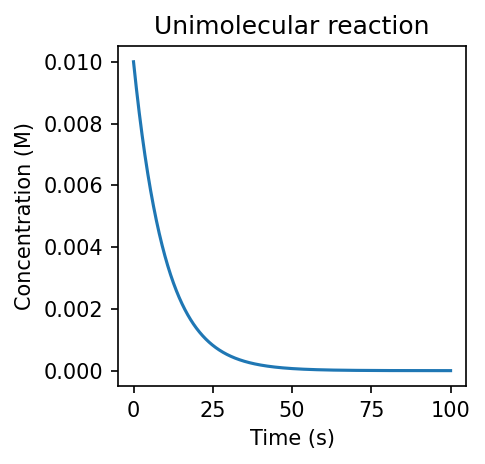

In [2]:
def unimolecular(t, C0, k1):
  return C0 * np.exp(-k1 *t) #function here
  
def bimolecular(t, C0, k2):
  return C0/(1+k2*C0*t) #function here
         

# unimolecular plot
t = np.linspace(0,100, 1000)
c = unimolecular(t, 10E-3, 0.1)

#customize the figure
plt.figure(figsize=(3,3),dpi=(150))
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title("Unimolecular reaction")

plt.plot(t,c)
plt.show()


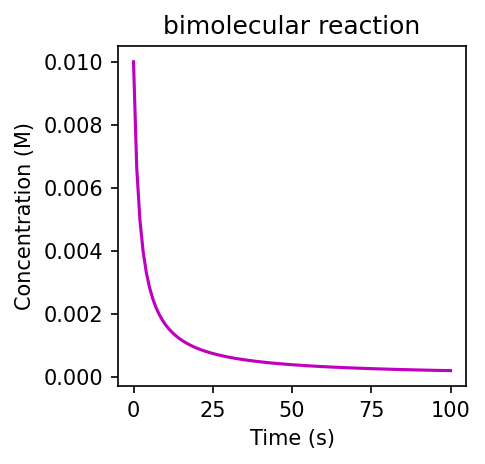

In [8]:
# bimolecular plot 
t2 = np.linspace(0,100, 100)
c2 = bimolecular(t2, 10E-3, 50)

#customize the figure
plt.figure(figsize=(3,3),dpi=(150))
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title("bimolecular reaction")

plt.plot(t2,c2, 'm')
plt.show()

# This is not correct. It looks wired and do not agree with the result of numerical method.

Now we want to use numerical methods to calculate the concentrations versus time. If we look at the documentation for solve_ivp, we have to give a function, which outputs all the derivations of our model. In the examples above we only have one concentration so we have a define a function of only the gives back dA/dt. Tests these numerical modesl with the analytical solutions for validity. Do this for both the unimolecular and bimolecular reactions. Note: the kinetic parameters can be given in solve_ivp as args = [k1]. 

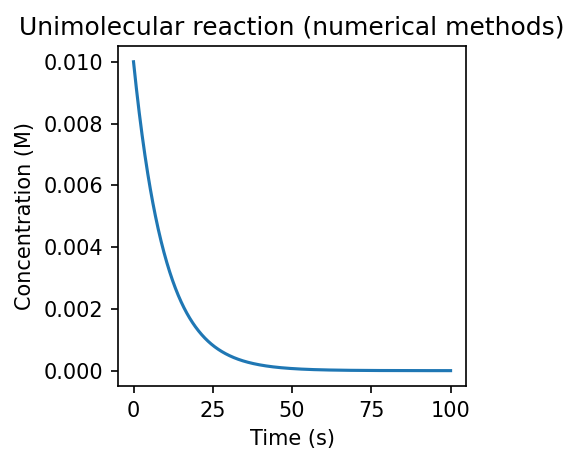

In [ ]:
def model_unimolecular(t, A, args):
  k1 = args
  DA = -k1 * A # change this line, DA stands for d[A]/dt
  return(DA)

sol_unimol = solve_ivp(model_unimolecular, [0, 100], [0.01], args = [0.1], t_eval = np.linspace(0, 100, 1000))
# print(sol_unimol.t)
# print(sol_unimol.y) 
# print(type(sol_unimol.y))
x1 = sol_unimol.t
y1 = sol_unimol.y[0]  

#customize the figure
plt.figure(figsize=(3,3),dpi=(150))
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title("Unimolecular reaction (numerical methods)")

plt.plot(x1,y1)
plt.show()

# Question: How to make the resolution much better? Is there anyway to increase the data points in x-axis as in analytical method?
# Answer: use 't_eval = np.linspace(0, 100, 1000)'

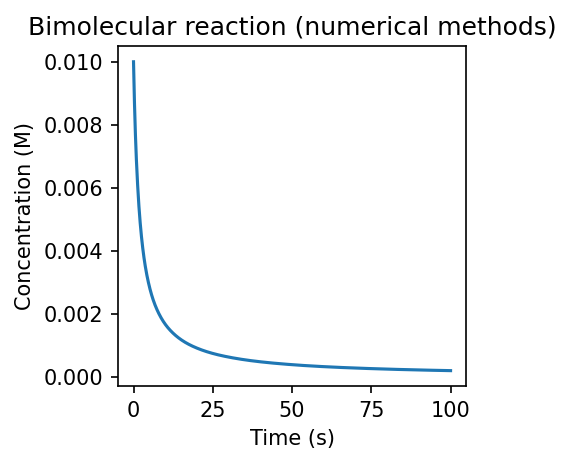

In [ ]:
def model_bimolecular(t, A, args):
  k2 = args
  DA = -k2 * (A**2)
  return(DA)

sol_bimol = solve_ivp(model_bimolecular, [0,100], [0.01], args = [50], t_eval = np.linspace(0, 100, 1000))

x2 = sol_bimol.t
y2 = sol_bimol.y[0]  

#customize the figure
plt.figure(figsize=(3,3),dpi=(150))
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title("Bimolecular reaction (numerical methods)")

plt.plot(x2,y2)
plt.show()


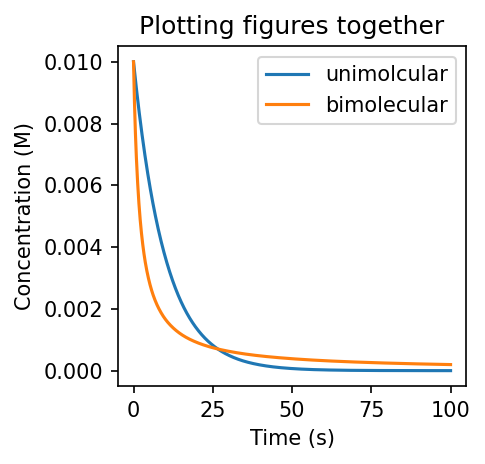

In [ ]:
plt.figure(figsize=(3,3),dpi=(150))
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title(" Plotting figures together ")

plt.plot(x1,y1,label='unimolcular')
plt.plot(x2,y2,label='bimolecular')
plt.legend()
plt.show()

You have gotten good aggrement with the numerical and analytical solutions. Now we will continue to look as cases where there is no analytical solution possible. First we will look at the pre-equilibrium case of the document:
$$
A + B \rightleftharpoons_{k2}^{k1} C \xrightarrow{k3} D
$$
The kinetic equations are given the document also. Calculate the calculations over time with the following paramters:

A[0] = 10 mM \\
B[0] = 20 mM \\
C[0] = 0 mM \\
D[0] = 0 mM \\

k1 = 100 s$^{-1}$ M$^{-1}$ \\
k2 = 0.5 s$^{-1}$ M$^{-1}$ \\
k3 = 0.1 s$^{-1}$ \\

Hint: you can increase the number of points at which the model is evalutated by added for example: 't_eval = np.linspace(0, 30, 1000)' (this means t is evaluated at 1000 points, equally spaced between 0 and 30, so the 30 should be changed to increase the range)


In [ ]:
# This script does not work properly. Don't know why.

# def model_new_case(t, C0, args):
#   k1 = args[0]
#   k2 = args[1]
#   k3 = args[2]
#   A = C0[0]
#   B = C0[1]
#   C = C0[2]
#   D = C0[3]
#   DA = -k1 * A * B  + k2 * C
#   DB = -k1 * A * B  + k2 * C
#   DC = k1 * A * B - k2 * C - k3 * C
#   DD = k3 * C 
#   return np.array([DA,DB,DC,DD])

# # sol_new = solve_ivp(model_new_case, [0, 100], np.array([0.01, 0.02, 0, 0]), args=np.array([100, 0.5, 0.1]))#, t_eval=np.linspace(0, 100, 1000))
# sol_new = solve_ivp(model_new_case, [0, 100], [0.01, 0.02, 0, 0], args=[100, 0.5, 0.1])#, t_eval=np.linspace(0, 100, 1000))
# t=sol_new.t
# t=sol_new.t
# c_A = sol_new.y[0]
# c_B = sol_new.y[1]
# c_C = sol_new.y[2]
# d_D = sol_new.y[3]

# plt.plot(t,c_A,c='black', label="A")
# plt.plot(t,c_B,c='blue', label = "B")
# plt.plot(t,c_C,c='red', label ='C')
# plt.plot(t,c_D,c='orange',label = 'D')


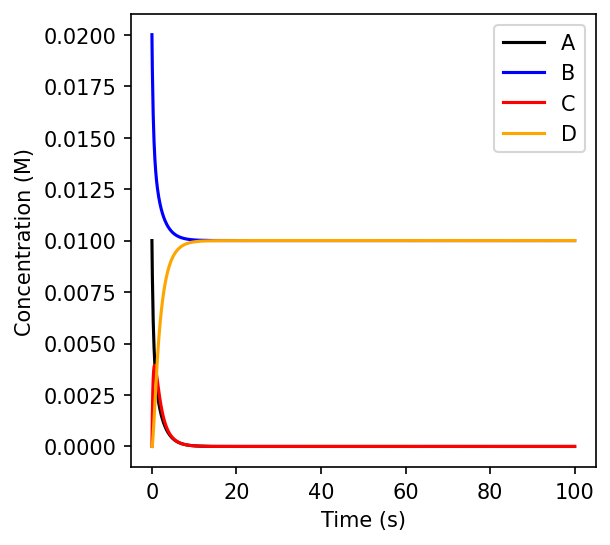

In [ ]:
def model_new_case(t, C0):
  k1 = 100
  k2 = 0.5
  k3 = 1
  A = C0[0]
  B = C0[1]
  C = C0[2]
  D = C0[3]
  DA = -k1 * A * B  + k2 * C
  DB = -k1 * A * B  + k2 * C
  DC = k1 * A * B - k2 * C - k3 * C
  DD = k3 * C 
  return np.array([DA,DB,DC,DD])

# sol_new = solve_ivp(model_new_case, [0, 100], np.array([0.01, 0.02, 0, 0]), args=np.array([100, 0.5, 0.1]))#, t_eval=np.linspace(0, 100, 1000))
sol_new = solve_ivp(model_new_case, [0, 100], [0.01, 0.02, 0, 0], t_eval=np.linspace(0, 100, 1000))
t=sol_new.t
t=sol_new.t
c_A = sol_new.y[0]
c_B = sol_new.y[1]
c_C = sol_new.y[2]
c_D = sol_new.y[3]

plt.figure(figsize=(4,4),dpi=150)
plt.plot(t,c_A,c='black', label="A")
plt.plot(t,c_B,c='blue', label = "B")
plt.plot(t,c_C,c='red', label ='C')
plt.plot(t,c_D,c='orange',label = 'D')

plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.legend()
plt.show()

It is often not possible to observe intermediates (in this case species C) under normal conditions. A typical limit-of-detection is about 10 mM (for Raman spectroscopy) Change k1 and k3 untill a reasonable (~0.001 M) concentration of [C] is build up, asses of how the maximum concentration of [C] is affected by changing k1 and k3. 

Answer (by Yuru)
*   While keeping k2, k3 the same, maxmium of C increases while decrease k1 and vice versa.
*   While keeping k1, k2 the same, maxmium of C increases while decrease k3 and vice versa.



# Complicated Reaction Mechanisms
Calculate the concentrations in time for the following system:

\begin{array} \\
A + B & \rightleftharpoons_{k2}^{k1} C \\
C + D & \xrightarrow{k3} E + A \\
E + F & \xrightarrow{k4} D + G \\
E + H & \xrightarrow{k5} D + I\\
\end{array}

with:

$$
\begin{align}
k_1&= 3 \text{ M$^{-1}$ s$^{-1}$} \\ 
k_2&= 2 \text{ s$^{-1}$} \\ 
k_3&= 2 \text{ M$^{-1}$ s$^{-1}$} \\ 
k_4&= 0.1 \text{ M$^{-1}$ s$^{-1}$} \\ 
k_5&= 0.12 \text{ M$^{-1}$ s$^{-1}$} \\ 
[A]_0 & = 0.10 \text{ M} \\
[B]_0 & = 0.10 \text{ M} \\
[C]_0 & = 0 \text{ M} \\
[D]_0 & = 0.01 \text{ M} \\
[E]_0 & = 0 \text{ M} \\
[F]_0 & = 0.10 \text{ M} \\
[G]_0 & = 0 \text{ M} \\
[H]_0 & = 0.10 \text{ M} \\
[I]_0 & = 0\text{ M} \\
\end{align}
$$

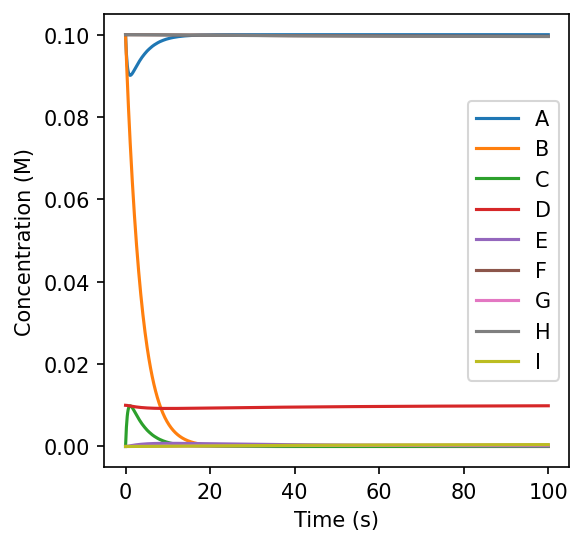

In [9]:
def model_compl(t,C0):
  K1=3
  K2=2
  K3=2
  K4=0.1
  K5=0.12
  A= C0[0]
  B= C0[1]
  C= C0[2]
  D= C0[3]
  E= C0[4]
  F= C0[5]
  G= C0[6]
  H= C0[7]
  I= C0[8]
  DA = -K1*A*B + K2*C + K3*C*D
  DB = -K1*A*B
  DC = K1*A*B - K2*C -K3*C*D
  DD = -K3*C*D + K4*E*F + K5*E*H
  DE = K3*C*D - K4*E*F - K5*E*H
  DF = -K4*E*F
  DG = K4*E*F
  DH = -K5*E*H
  DI = K5*E*H
  return np.array([DA,DB,DC,DD,DE,DF,DG,DH,DI])

sol_compl = solve_ivp(model_compl, [0, 100], [0.1, 0.1, 0.0, 0.01, 0.0, 0.1, 0.0, 0.1, 0.0], t_eval=np.linspace(0, 100, 1000))
t=sol_compl.t
c_A = sol_compl.y[0]
c_B = sol_compl.y[1]
c_C = sol_compl.y[2]
c_D = sol_compl.y[3]
c_E = sol_compl.y[4]
c_F = sol_compl.y[5]
c_G = sol_compl.y[6]
c_H = sol_compl.y[7]
c_I = sol_compl.y[8]

plt.figure(figsize=(4,4),dpi=150)
plt.plot(t,c_A, label='A')
plt.plot(t,c_B, label = 'B')
plt.plot(t,c_C, label ='C')
plt.plot(t,c_D, label = 'D')
plt.plot(t,c_E, label='E')
plt.plot(t,c_F, label = 'F')
plt.plot(t,c_G, label ='G')
plt.plot(t,c_H, label = 'H')
plt.plot(t,c_I, label = 'I')

plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.legend()
plt.show()
